In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
np.random.seed(14)

In [ ]:
# Physical constants
c = 1
g129 = 1 #-74.4069*1e6       # rad  s^-1 T^-1 http://www.acadiau.ca/~bellis/resources/nmr/isotopes.html
g131 = 1 #22.0564*1e6        # rad  s^-1 T^-1 http://www.acadiau.ca/~bellis/resources/nmr/isotopes.html

# unit conversions
G2T = 1e-4                # Gauss to Tesla conversion. i.e. 5 Gauss * G2T = 5e-4 Tesla
T2G = 1e4                 # Tesla to Gauss conversion. i.e. 5 Tesla * T2G = 5e4 Gauss

In [ ]:
# useful functions
def l2_norm(a):
  return np.sqrt(np.sum(np.power(a, 2)))

In [ ]:
# init a averaged spin
K0 = np.random.randn(3)
K0 /= l2_norm(K0)

# set constant magnetic field
Bx = 0
By = 0
Bz = 1
B = np.array([[0, -Bz, By], 
              [Bz, 0, -Bx], 
              [-By, Bx, 0]])

# world rotation in z
w0 = 1  
omega_r = np.array([[0, -w0, 0], 
                    [w0, 0, 0], 
                    [0, 0, 0]])

# drive
wd = 1
omega_d = np.array([[0, 0, wd], 
                    [0, 0, 0], 
                    [wd, 0, 0]])

# set T1, T2
T1 = 30     # s
T2 = 8      # s
Gamma = np.diag(1 / np.array([T2, T2, T1]))
Gamma_se = 0.1*1/30              # Hz

# Alkali spin
S = np.array([0, 0, 1])

In [ ]:
# NMR dynamics equation
def dK_dt(k, t):
  Rse = Gamma_se * S
  return -(g129 * np.matmul(B + Gamma, k) + np.matmul(omega_r, k) + np.matmul(omega_d, k)) + Rse

In [ ]:
# solve ODE
ts = np.linspace(0, 40, 200)
K = odeint(dK_dt, K0, ts)
K.shape

(200, 3)

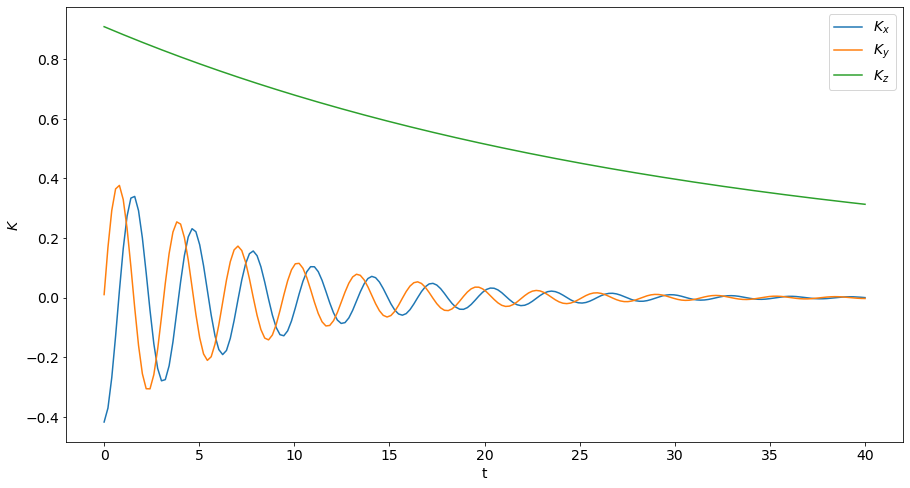

In [ ]:
# Plot the spin solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.figure(figsize=(15, 8))
plt.xlabel("t")
plt.ylabel("$K$")
plt.plot(ts, K[:, 0], label='$K_x$')
plt.plot(ts, K[:, 1], label='$K_y$')
plt.plot(ts, K[:, 2], label='$K_z$')
plt.legend()
plt.show()

In [ ]:
l2_norm(K[10, :])

0.9158207544029301